In [543]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
import numpy as np

In [545]:
# read in csv & display first 5 rows
kdramaData = pd.read_csv("kdramas_dataset.csv")
kdramaData.head()

,Rank,Title,Year of release,Number of Episodes,Rating,Description,Genre,Tags,Actors
0,#1,Move to Heaven,2021,10,9.2,Geu Roo is a young autistic man. He works for ...,"Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...","Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju..."
1,#2,Twinkling Watermelon,2023,16,9.2,"In 2023, high school student Eun Gyeol, a CODA...","Romance, Youth, Drama, Fantasy","Time Travel, Child From The Future, Sign Langu...","Ha Eun-Gyeol, Ha Yi-Chan, Choi Se-Kyung, Yoon ..."
2,#3,Moving,2023,20,9.1,"Kim Bong Seok, Jang Hui Su, and Lee Gang Hun, ...","Action, Thriller, Mystery, Supernatural","Graphic Violence, Supernatural Power, Multiple...","Ryu Seung Ryong, Han Hyo Joo, Zo In Sung"
3,#4,The Trauma Code: Heroes on Call,2025,8,9.1,"Baek Gang Hyeok, a genius trauma surgeon with ...","Action, Comedy, Drama, Medical","Surgeon Male Lead, Hospital Setting, Mentor-Me...","Ju Ji Hoon, Choo Young Woo, Ha Young, Yoon Gyu..."
4,#5,Flower of Evil,2020,16,9.1,Although Baek Hee Sung is hiding a dark secret...,"Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...","Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ..."


In [547]:
# display data info
kdramaData.info()
# seems to have no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                350 non-null    object 
 1   Title               350 non-null    object 
 2   Year of release     350 non-null    int64  
 3   Number of Episodes  350 non-null    int64  
 4   Rating              350 non-null    float64
 5   Description         350 non-null    object 
 6   Genre               350 non-null    object 
 7   Tags                350 non-null    object 
 8   Actors              350 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 24.7+ KB


In [549]:
# General Statistical Overview
# rounded to the nearest tenth
kdramaData.describe().drop(index='count').round(1)

,Year of release,Number of Episodes,Rating
mean,2019.8,18.3,8.4
std,3.7,14.6,0.5
min,2003.0,1.0,6.4
25%,2018.0,12.0,8.3
50%,2020.0,16.0,8.4
75%,2023.0,16.0,8.6
max,2025.0,133.0,9.2


In [551]:
# cleaning and pre-processing
kdramaData['Genre'] = kdramaData['Genre'].apply(lambda x: x.split(','))

mlb = MultiLabelBinarizer()
genre_matrix = mlb.fit_transform(kdramaData['Genre'])

features = np.hstack([genre_matrix, kdramaData['Rating'].values.reshape(-1, 1)])

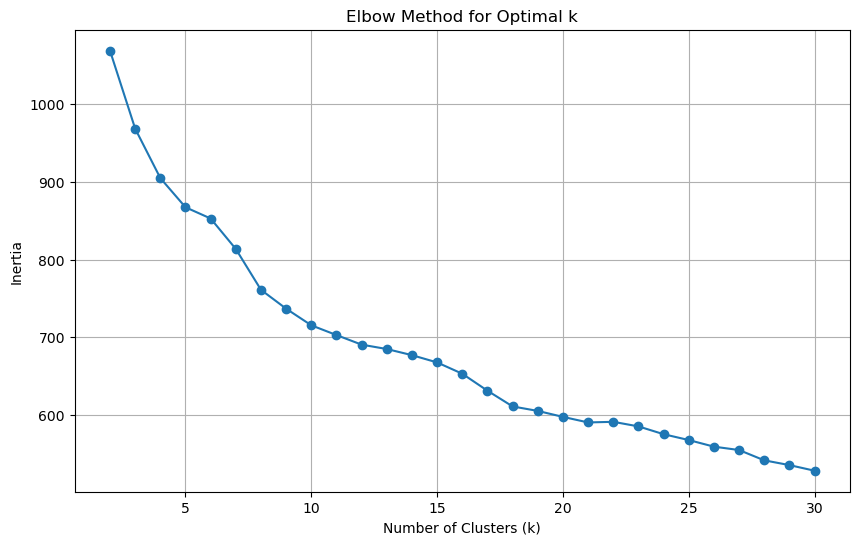

In [553]:
# cluster using elbow method
inertia_values = []
for k in range(2, 31):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia_values.append(kmeans.inertia_)

# plot inertia values
plt.figure(figsize=(10,6))
plt.plot(range(2, 31), inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()
# optimal k value is around k = 8 where it starts to go off and flatten

In [555]:
# k-means clustering with k=8
kmeans = KMeans(n_clusters=8, random_state=42)
kdramaData['cluster'] = kmeans.fit_predict(features)

In [557]:
# cluster analysis
grouped = kdramaData.groupby('cluster')

cluster_info = {}
for cluster, group in grouped:
    # Sample the number of entries available in each cluster
    sample_size = min(len(group), 2)  # Only sample as many as available in the group
    cluster_info[cluster] = {
        'count': len(group),
        'sample_titles': group.sample(n=sample_size)['Title'].values.tolist(),
        'sample_actors': group.sample(n=sample_size)['Actors'].values.tolist(),
        'sample_ratings': group.sample(n=sample_size)['Rating'].values.tolist()  # Add sample ratings
    }

print("Number of K-Dramas per cluster:")
print(kdramaData['cluster'].value_counts())

Number of K-Dramas per cluster:
cluster
4    57
2    57
0    56
6    46
1    39
5    37
7    36
3    22
Name: count, dtype: int64


In [541]:
# example analysis of cluster representation
cluster_analysis = {
    0: "Cluster 0 represents crime dramas or thrillers that feature strong lead performances.",
    1: "Cluster 1 focuses on romantic dramas or slice-of-life stories, with a likely mature audience.",
    2: "Cluster 2 includes fantasy or supernatural K-Dramas, likely with elements of mystery or adventure.",
    3: "Cluster 3 represents coming-of-age dramas or youth-oriented stories.",
    4: "Cluster 4 popular contains medical dramas, possibly with elements of romance or personal relationships.",
    5: "Cluster 5 represents lower rated romantic-comedies or fantasy dramas.",
    6: "Cluster 6 represents family and investigative high rated dramas with strong emotional depth.",
    7: "Cluster 7 features political or action-packed K-Dramas."
}

for cluster, description in cluster_analysis.items():
    print(f"{description}\n")

cluster_summary = pd.DataFrame(cluster_info).T
print(cluster_summary)

Cluster 0 represents crime dramas or thrillers that feature strong lead performances.

Cluster 1 focuses on romantic dramas or slice-of-life stories, with a likely mature audience..

Cluster 2 includes fantasy or supernatural K-Dramas, likely with elements of mystery or adventure.

Cluster 3 represents coming-of-age dramas or youth-oriented stories.

Cluster 4 contains medical dramas, possibly with elements of romance or personal relationships.

Cluster 5 represents romantic-comedies or lighthearted fantasy dramas.

Cluster 6 represent medical dramas or thrillers with a focus on professionalism and deep character development.

Cluster 7 features political or action-packed K-Dramas.

  count                                      sample_titles  \
0    56                                 [Voice, Pale Moon]   
1    39                [The Real Has Come!, Love All Play]   
2    57                              [W, Alchemy of Souls]   
3    22               [Twenty-Five Twenty-One, Love Scout]  

In [537]:
average_ratings = kdramaData.groupby('cluster')['Rating'].mean()

# display sample titles, actors, ratings, and average rating for each cluster
for cluster, info in cluster_info.items():
    print(f"\nCluster {cluster}:")
    print(f"Count: {info['count']} K-Dramas")
    print(f"Sample Titles: {', '.join(info['sample_titles'])}")
    print(f"Sample Actors: {', '.join(info['sample_actors'])}")
    print(f"Sample Ratings: {', '.join(map(str, info['sample_ratings']))}")
    print(f"Average Rating: {average_ratings[cluster]:.2f}\n")  # Display average rating for the cluster


Cluster 0:
Count: 56 K-Dramas
Sample Titles: Voice, Pale Moon
Sample Actors: Lee Jin Wook, Kwon Na Ra, Lee Joon, Gong Seung Yeon, Jung Jin Young, Kim Woo Seok, Yoon Shi Yoon, Jung In Sun, Park Sung Hoon, Lee  Han Wi, Hwang Geum Byul, Kim Kyul
Sample Ratings: 8.3, 8.6
Average Rating: 8.14


Cluster 1:
Count: 39 K-Dramas
Sample Titles: The Real Has Come!, Love All Play
Sample Actors: Kim Hee Ae, Moon So Ri, Ryu Soo Young, Kim Dong Hee, Park Ju Hyun, Jung Da Bin, Nam Yoon Su, Choi Min Soo, Park Hyuk Kwon
Sample Ratings: 8.3, 8.3
Average Rating: 8.11


Cluster 2:
Count: 57 K-Dramas
Sample Titles: W, Alchemy of Souls
Sample Actors: Jung Eun Ji, Choi Jin Hyuk, Baek Seo Hoo, Lee Jung Eun, Han Ye Ri, Han Seung Yeon, Park Eun Bin, Ji Woo, Choi A Ra, Kim Min Seok
Sample Ratings: 8.0, 7.2
Average Rating: 8.25


Cluster 3:
Count: 22 K-Dramas
Sample Titles: Twenty-Five Twenty-One, Love Scout
Sample Actors: Park Eun Bin, Kang Tae Oh, Kang Ki Young, Jeon Bae Soo, Baek Ji Won, Jin Kyung, Lee Sun Bin,